In [1]:
from __future__ import print_function
import sys
import os
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob

#matplotlib.rcParams['savefig.dpi'] = 2 * matplotlib.rcParams['savefig.dpi'] # larger image
#matplotlib.rcParams['figure.figsize']= (20.0, 10.0) # larger image


print("Python version:\n{}\n".format(sys.version))
print("matplotlib version: {}".format(matplotlib.__version__))
print("pandas version: {}".format(pd.__version__))
print("numpy version: {}".format(np.__version__))
print("seaborn version: {}".format(sns.__version__))

Python version:
3.6.6 |Anaconda custom (64-bit)| (default, Oct  9 2018, 12:34:16) 
[GCC 7.3.0]

matplotlib version: 3.0.0
pandas version: 0.23.4
numpy version: 1.12.1
seaborn version: 0.9.0


In [2]:
root_path = '../2-Run1'  # The path to the directory containing the systems

igbs = ['igb1', 'igb2', 'igb5', 'igb8']  # Each of the systems as named in their directory

ffs = ['ff94','ff96','ff98','ff99', 'ff99SB', 'ff99SBildn', 'ff99SBnmr', 'ff03.r1', 'ff14SB', \
       'ff14SBonlysc','ff14ipq','fb15','ff15ipq']  # The name of the state directories
prots = ['E4K42', 'K4E42']

filename_pattern = 'helicity.dat'  # The glob to match the data files to read

dfs = {}  # Mapping of system name to list of state DataFrames

igbff_all = []
for ff in ffs:
    for igb in igbs:
    #igbff_all = []
        for prot in prots:
            direc=igb + '_'+ ff + '_'+ prot
            # For each system and state, grab all the data files that match the glob
            file_glob = os.path.join(root_path, direc, filename_pattern)
            files = glob.glob(file_glob)
            for f in files:
                # Read each into a file to be put into a dict
                df = pd.read_csv(f, sep=r'\s+', skiprows=1, names=['Frame', 'Fraction helicity'])
                df[r'Time ($\mu$s)'] = df['Frame']/10000
                df['Helicity (%)'] = df['Fraction helicity']*100*21/19
                df['Mouving average']=pd.Series.rolling(df['Helicity (%)'],window=500,center=False).mean()
                df['igb'] = igb
                df['ff'] = ff
                df['Peptide'] = prot
                df['igbff'] = '{0} {1}'.format(ff, igb)
                df['igbffprot'] = '{0} {1} {2}'.format(ff, igb, prot)
                igbff_all.append(df)
df_total = pd.concat(igbff_all)
print(df_total.head())

   Frame  Fraction helicity  Time ($\mu$s)  Helicity (%)  Mouving average  \
0      1              0.714         0.0001     78.915789              NaN   
1      2              0.810         0.0002     89.526316              NaN   
2      3              0.714         0.0003     78.915789              NaN   
3      4              0.762         0.0004     84.221053              NaN   
4      5              0.762         0.0005     84.221053              NaN   

    igb    ff Peptide      igbff        igbffprot  
0  igb1  ff94   E4K42  ff94 igb1  ff94 igb1 E4K42  
1  igb1  ff94   E4K42  ff94 igb1  ff94 igb1 E4K42  
2  igb1  ff94   E4K42  ff94 igb1  ff94 igb1 E4K42  
3  igb1  ff94   E4K42  ff94 igb1  ff94 igb1 E4K42  
4  igb1  ff94   E4K42  ff94 igb1  ff94 igb1 E4K42  


In [3]:
85.7*21/19

94.72105263157896

/home/el14718/Software/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


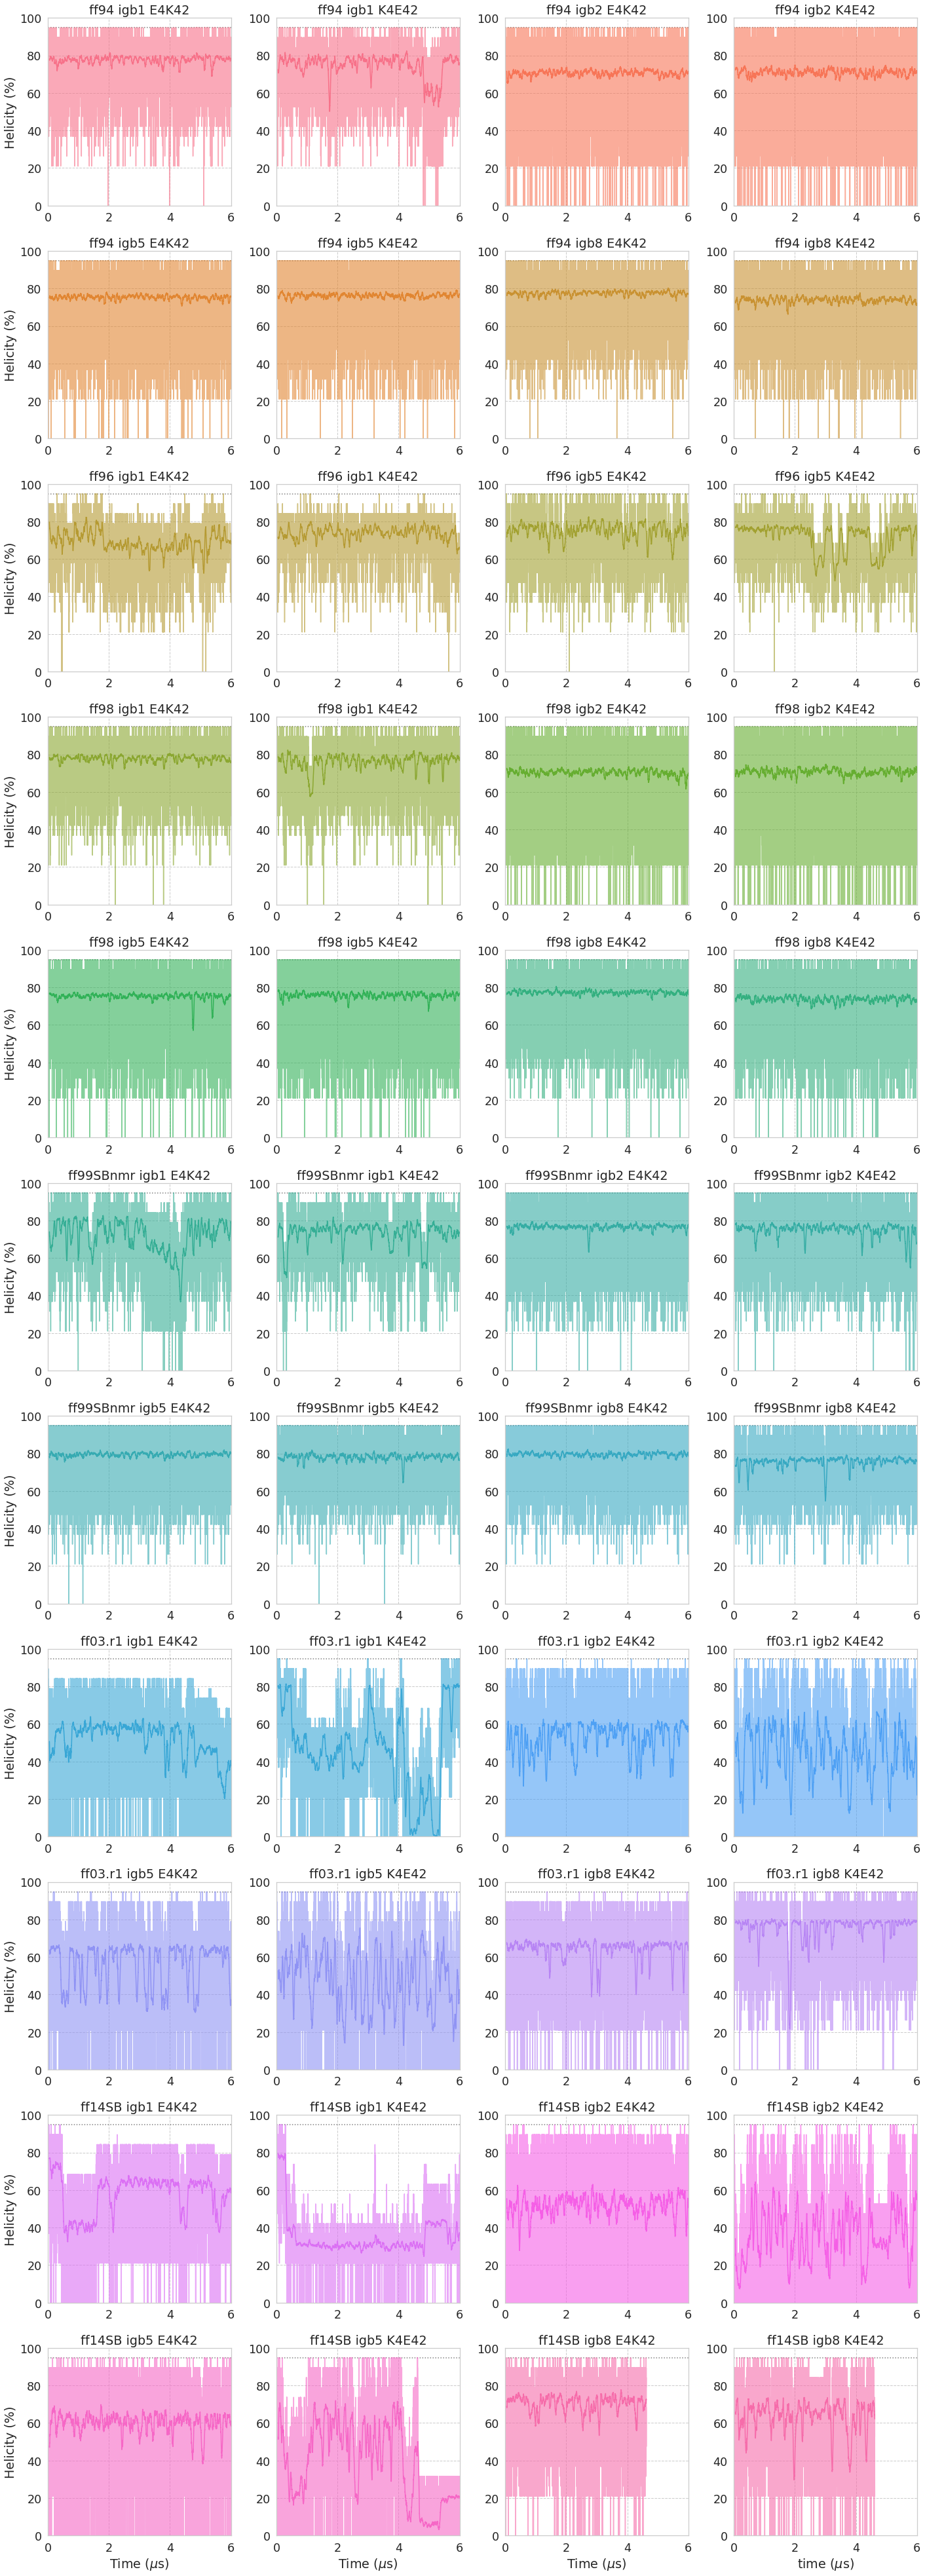

In [4]:
sns.set(context='notebook', style='whitegrid', palette='deep', font='sans-serif',\
        font_scale=1.6, rc={'grid.linestyle': '--'})

grid = sns.FacetGrid(df_total, col="igbffprot", col_wrap=4, hue="igbff", size=5, aspect=1,\
                     sharex=False, sharey=False, despine=False, legend_out=False)


# Draw a horizontal line to show the starting point
grid.map(plt.axhline, y=94.72, ls=":", c=".5") # 85.7*21/19

grid.map(plt.plot, r'Time ($\mu$s)', 'Mouving average').set_titles("{col_name}")
grid.map(plt.plot, r'Time ($\mu$s)', 'Helicity (%)', alpha=0.6).set_titles("{col_name}")
# Adjust the tick positions and labels
#grid.set(xticks=np.arange(5), yticks=[-3, 3],
         #xlim=(-.5, 4.5), ylim=(-3.5, 3.5))

# Adjust the arrangement of the plots
#grid.fig.tight_layout(w_pad=1)
grid.set(xlim=(0, 6) , ylim=(0, 100))
plt.xlabel(r'time ($\mu$s)')
#plt.ylabel('Percentage helicity (%)')
plt.tight_layout()
#plt.savefig('./helicity.pdf')
plt.savefig('./helicity.png', dpi=300)
plt.show()

In [5]:
df_total.groupby('igbffprot')['Helicity (%)'].mean()

igbffprot
ff03.r1 igb1 E4K42      51.606312
ff03.r1 igb1 K4E42      45.851487
ff03.r1 igb2 E4K42      52.258758
ff03.r1 igb2 K4E42      44.831938
ff03.r1 igb5 E4K42      55.943722
ff03.r1 igb5 K4E42      47.543751
ff03.r1 igb8 E4K42      63.968669
ff03.r1 igb8 K4E42      75.596255
ff14SB igb1 E4K42       57.333828
ff14SB igb1 K4E42       34.894027
ff14SB igb2 E4K42       51.712611
ff14SB igb2 K4E42       36.059715
ff14SB igb5 E4K42       60.012494
ff14SB igb5 K4E42       38.669313
ff14SB igb8 E4K42       70.386446
ff14SB igb8 K4E42       63.129605
ff94 igb1 E4K42         77.587974
ff94 igb1 K4E42         74.451716
ff94 igb2 E4K42         70.546403
ff94 igb2 K4E42         70.929467
ff94 igb5 E4K42         75.234956
ff94 igb5 K4E42         76.159210
ff94 igb8 E4K42         77.374865
ff94 igb8 K4E42         73.761107
ff96 igb1 E4K42         69.025510
ff96 igb1 K4E42         73.775535
ff96 igb5 E4K42         75.072618
ff96 igb5 K4E42         71.329668
ff98 igb1 E4K42         77.720781
ff98

In [6]:
df_total.groupby(['igbff','Peptide'])['Helicity (%)'].mean()

igbff           Peptide
ff03.r1 igb1    E4K42      51.606312
                K4E42      45.851487
ff03.r1 igb2    E4K42      52.258758
                K4E42      44.831938
ff03.r1 igb5    E4K42      55.943722
                K4E42      47.543751
ff03.r1 igb8    E4K42      63.968669
                K4E42      75.596255
ff14SB igb1     E4K42      57.333828
                K4E42      34.894027
ff14SB igb2     E4K42      51.712611
                K4E42      36.059715
ff14SB igb5     E4K42      60.012494
                K4E42      38.669313
ff14SB igb8     E4K42      70.386446
                K4E42      63.129605
ff94 igb1       E4K42      77.587974
                K4E42      74.451716
ff94 igb2       E4K42      70.546403
                K4E42      70.929467
ff94 igb5       E4K42      75.234956
                K4E42      76.159210
ff94 igb8       E4K42      77.374865
                K4E42      73.761107
ff96 igb1       E4K42      69.025510
                K4E42      73.775535
ff96 igb5     

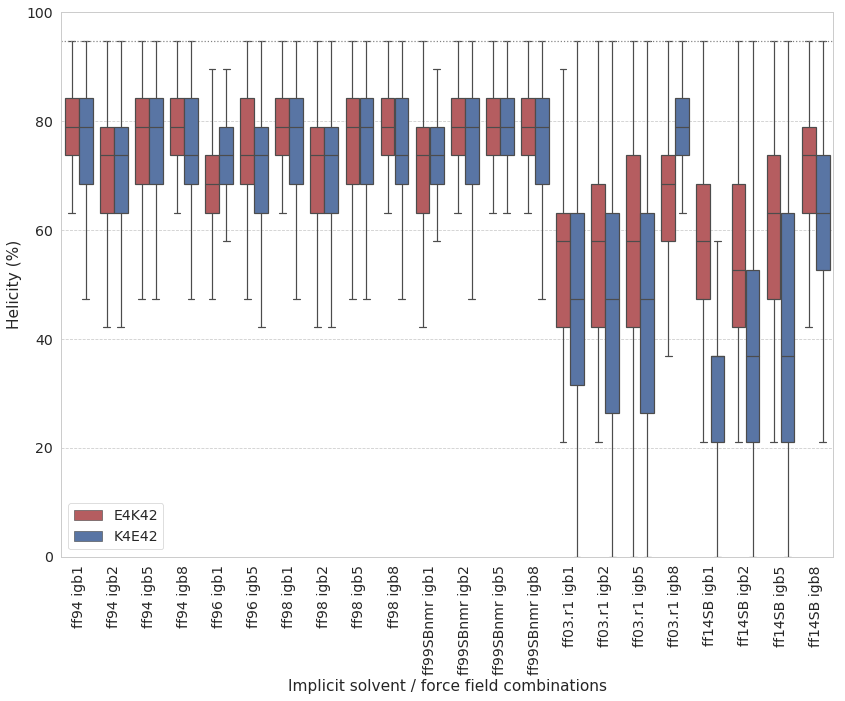

In [7]:
deep2=["#C44E52", "#4C72B0","#8172B2" ,"#4C72B0","#4C72B0",
       "#64B5CD", "#CCB974", "#55A868"]

sns.set(context='paper', style='whitegrid', palette=sns.color_palette(deep2), font='sans-serif',\
        font_scale=1.6, rc={'grid.linestyle': '--'}, color_codes=False)

fig, axes = plt.subplots(figsize=(12, 10))

ax=sns.boxplot(x='igbff', y='Helicity (%)', hue='Peptide', data=df_total, fliersize=0)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set_ylim([0, 100])  
ax.set_xlabel('Implicit solvent / force field combinations')
plt.axhline(y=94.72, ls=":", c=".5" ) # 90.9*33/31
plt.tight_layout()
#plt.savefig('./helicity_boxplot.pdf', dpi=600)
plt.legend(loc='lower left')
plt.savefig('./helicity_boxplot.png', dpi=600)

In [8]:
temp=df_total.drop(columns=['Frame', 'Fraction helicity', r'Time ($\mu$s)', 'Mouving average', 'igb','ff', 'igbff', 'Peptide' ])
temp

,Helicity (%),igbffprot
0,78.915789,ff94 igb1 E4K42
1,89.526316,ff94 igb1 E4K42
2,78.915789,ff94 igb1 E4K42
3,84.221053,ff94 igb1 E4K42
4,84.221053,ff94 igb1 E4K42
5,84.221053,ff94 igb1 E4K42
6,89.526316,ff94 igb1 E4K42
7,84.221053,ff94 igb1 E4K42
8,84.221053,ff94 igb1 E4K42
9,78.915789,ff94 igb1 E4K42


In [9]:
grouped=temp.groupby(['igbffprot'])
grouped

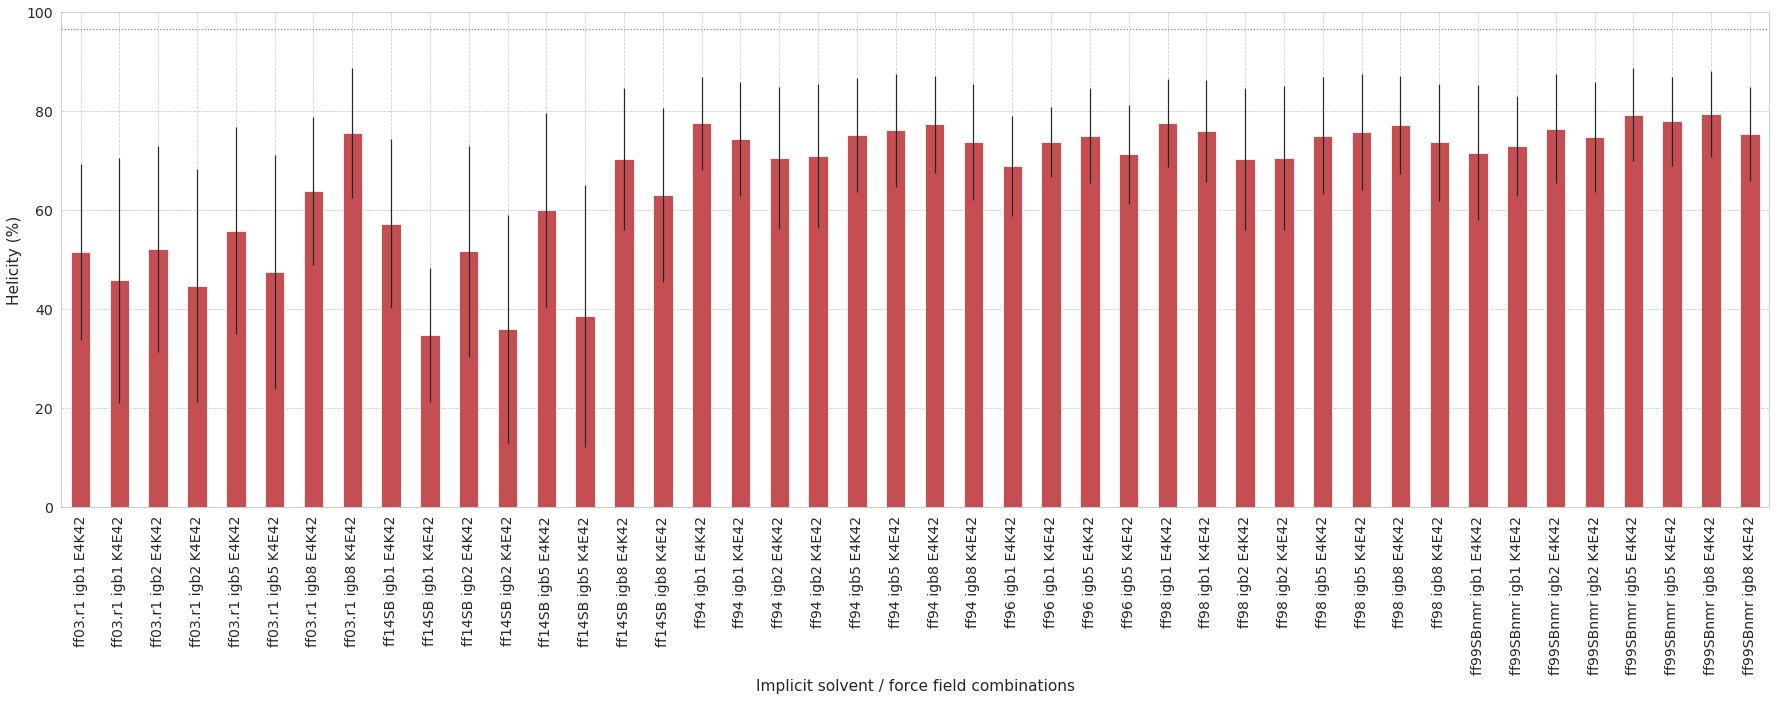

In [12]:
mean = grouped.mean()

errors = grouped.std()


ax=mean.plot(yerr=errors, kind='bar',figsize=(25,10), ylim=(0, 100), legend=False, rot=90 )
ax.set_ylabel('Helicity (%)')
ax.set_xlabel('Implicit solvent / force field combinations')
plt.axhline(y=96.76, ls=":", c=".5" ) # 90.9*33/31
plt.tight_layout()
#plt.savefig('./helicity_avg.pdf')
plt.savefig('./helicity_avg.png', dpi=300)
#plt.show()